In [1]:
#1. Importing dataset and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("LoanApprovalPrediction.csv")  # Replace with your actual file path
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# View structure and summary
print(df.info())      # Data types and non-null counts
print(df.describe())  # Summary stats for numerical columns
print(df.isnull().sum())  # Missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB
None
       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  586.000000       598.000000    

In [3]:
# Check for missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

Columns with missing values: ['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [4]:
# Handle missing categorical values
categorical_with_missing = ['Credit_History', 'Dependents']
for col in categorical_with_missing:
    if col in missing_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Handle missing numerical values
numerical_with_missing = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_with_missing:
    if col in missing_cols:
        df[col].fillna(df[col].median(), inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#3. Convert categorical features into numerical using encoding.
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary columns
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot Encoding for multiclass
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=False)
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,127.0,360.0,1.0,1,True,False,False,False,False,False,True
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,False,True,False,False
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,True,False,False,False,False,False,True
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,True,False,False,False,False,False,True
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,True


In [6]:
#4. Normalize/standardize the numerical features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.095951,-0.552892,-0.213425,0.274031,1.0,1,True,False,False,False,False,False,True
1,LP001003,1,1,0,0,-0.122234,-0.041852,-0.201115,0.274031,1.0,0,False,True,False,False,True,False,False
2,LP001005,1,1,0,1,-0.395052,-0.552892,-0.964324,0.274031,1.0,1,True,False,False,False,False,False,True
3,LP001006,1,1,1,0,-0.466919,0.246201,-0.299594,0.274031,1.0,1,True,False,False,False,False,False,True
4,LP001008,1,0,0,0,0.121975,-0.552892,-0.041088,0.274031,1.0,1,True,False,False,False,False,False,True


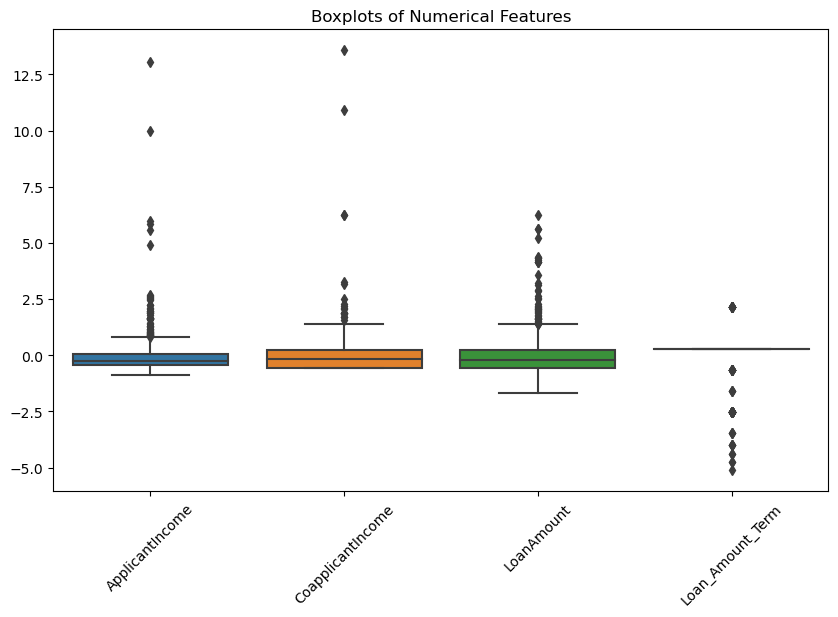

In [7]:
# Boxplot to visualize outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [10]:
# Remove outliers using IQR(1st round)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    
print(df.shape)
df.head()


(392, 18)


,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.095951,-0.552892,-0.213425,0.274031,1.0,1,True,False,False,False,False,False,True
1,LP001003,1,1,0,0,-0.122234,-0.041852,-0.201115,0.274031,1.0,0,False,True,False,False,True,False,False
2,LP001005,1,1,0,1,-0.395052,-0.552892,-0.964324,0.274031,1.0,1,True,False,False,False,False,False,True
3,LP001006,1,1,1,0,-0.466919,0.246201,-0.299594,0.274031,1.0,1,True,False,False,False,False,False,True
4,LP001008,1,0,0,0,0.121975,-0.552892,-0.041088,0.274031,1.0,1,True,False,False,False,False,False,True


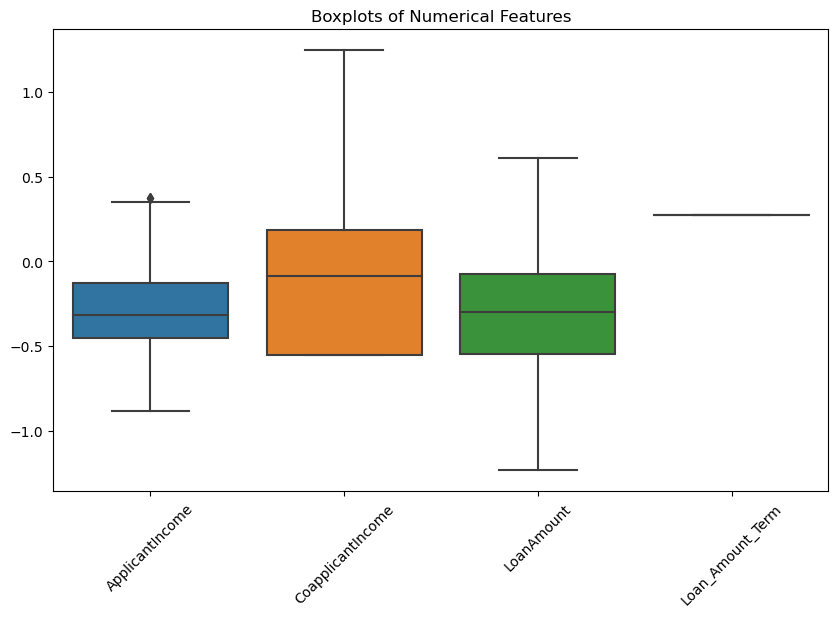

In [11]:
# Boxplot to visualize outliers after 1st round of removing outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [12]:
# Remove outliers using IQR(2nd round)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    
print(df.shape)
df.head()

(390, 18)


,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.095951,-0.552892,-0.213425,0.274031,1.0,1,True,False,False,False,False,False,True
1,LP001003,1,1,0,0,-0.122234,-0.041852,-0.201115,0.274031,1.0,0,False,True,False,False,True,False,False
2,LP001005,1,1,0,1,-0.395052,-0.552892,-0.964324,0.274031,1.0,1,True,False,False,False,False,False,True
3,LP001006,1,1,1,0,-0.466919,0.246201,-0.299594,0.274031,1.0,1,True,False,False,False,False,False,True
4,LP001008,1,0,0,0,0.121975,-0.552892,-0.041088,0.274031,1.0,1,True,False,False,False,False,False,True


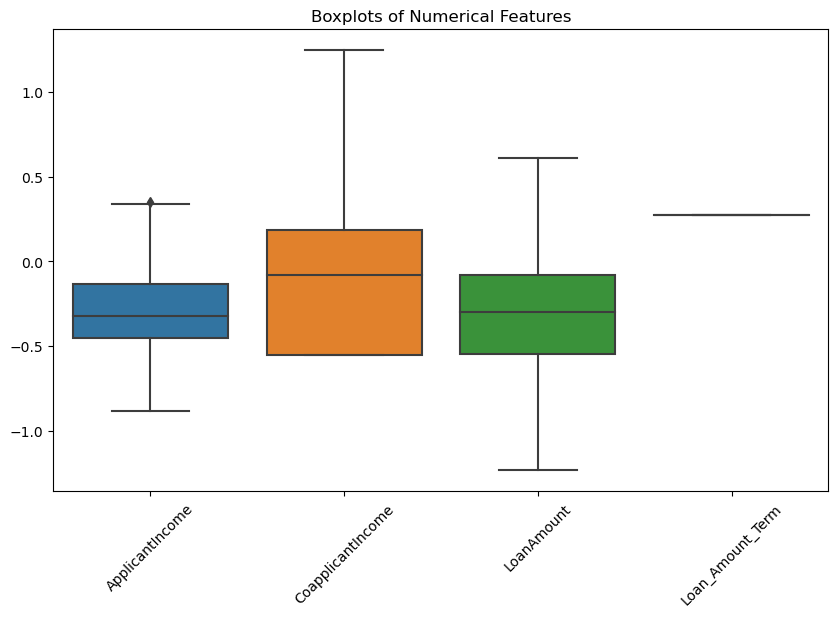

In [13]:
# Boxplot to visualize outliers after 2nd round of removing outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()